# Vaqt seriyalari tahlili  

**Loyiha mavzusi:**

"Aviachiptalar soni (AirPassengers) bo'yicha vaqt seriyasi tahlili va prognozi"

Bu datasetda 1949-1960 yillar oralig'ida har oyda qancha yo'lovchi samolyotda uchganligi ko'rsatilgan.

Kutubxonalarni chaqirish

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

datasetni yuklash

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.rename(columns={'Passengers': 'passengers'}, inplace=True)

df.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


vizualizatsiya

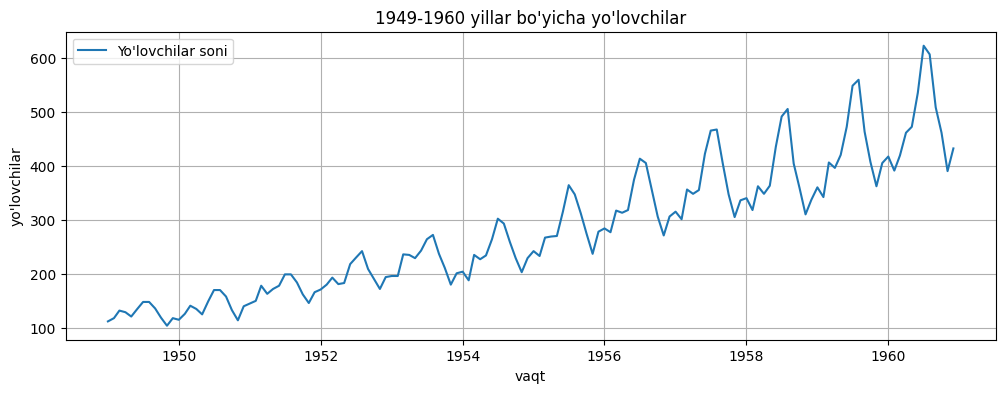

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['passengers'], label="Yo'lovchilar soni")
plt.title("1949-1960 yillar bo'yicha yo'lovchilar")
plt.xlabel("vaqt")
plt.ylabel("yo'lovchilar")
plt.grid()
plt.legend()
plt.show()

Decomposition - trend, seasonality, noise

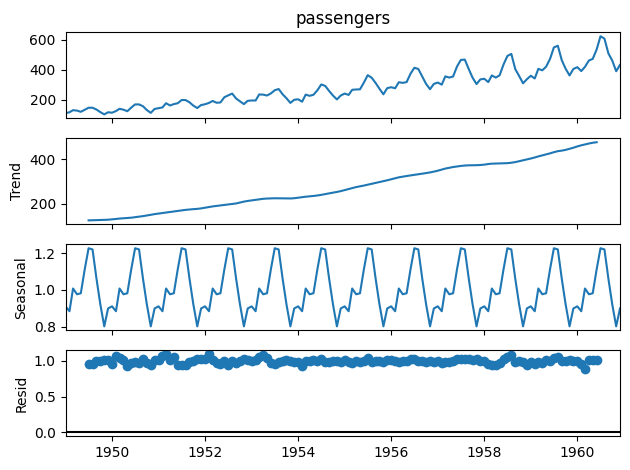

In [8]:
decomposition = seasonal_decompose(df['passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

Stationarity testi (ADF test)

In [9]:
result = adfuller(df['passengers'])
print("ADF statistikasi:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("✅ Series stationary (barqaror)")
else:
    print("❌ Series non-stationary (barqaror emas)")

ADF statistikasi: 0.8153688792060498
p-value: 0.991880243437641
❌ Series non-stationary (barqaror emas)


differencing qilamiz

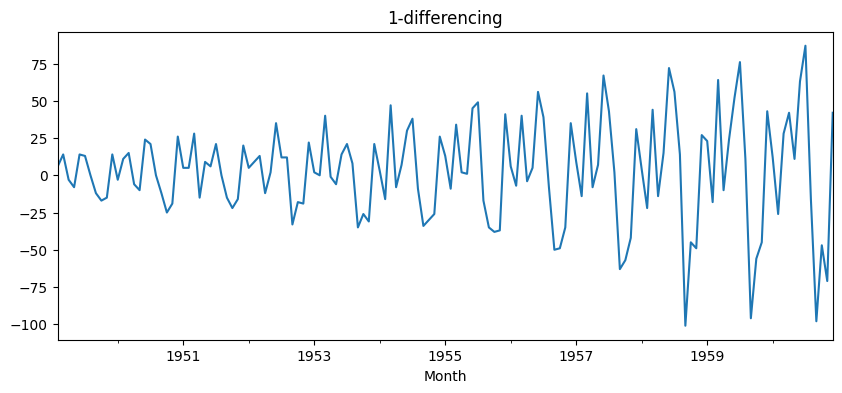

In [10]:
df['diff'] = df['passengers'].diff()
df['diff'].dropna().plot(figsize=(10,4), title='1-differencing')
plt.show()

ARIMA modeli qurish

In [12]:
# 1 ta differencing ishlatamiz, shuning uchun d=1
model = ARIMA(df['passengers'], order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 11 Jul 2025   AIC                           1353.347
Time:                        21:14:41   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

Prognoz qilish

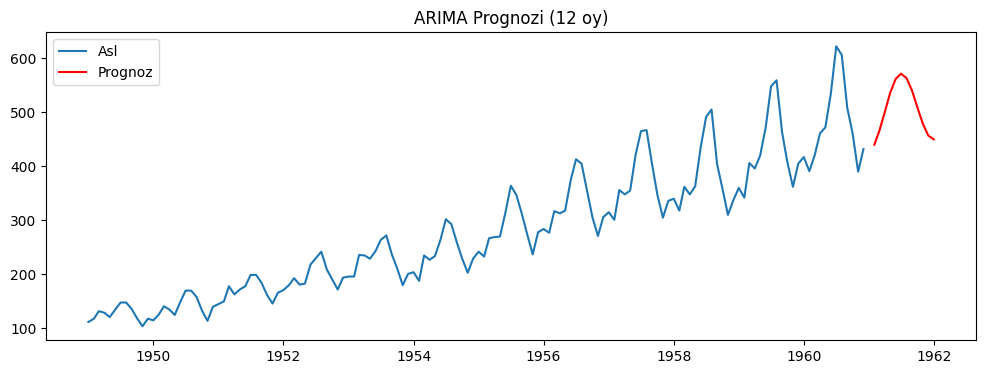

In [13]:
# 12 oylik prognoz
forecast = model_fit.forecast(steps=12)
forecast.index = pd.date_range(start='1961-01-01', periods=12, freq='M')

# Vizual taqqoslash
plt.figure(figsize=(12, 4))
plt.plot(df['passengers'], label='Asl')
plt.plot(forecast, label='Prognoz', color='red')
plt.title("ARIMA Prognozi (12 oy)")
plt.legend()
plt.show()

Baholash (Model qanday ishladi?)

Haqiqiy ma'lumotning oxirgi 12 oyi bilan taqqoslab ko'rish uchun:

RMSE: 55.22


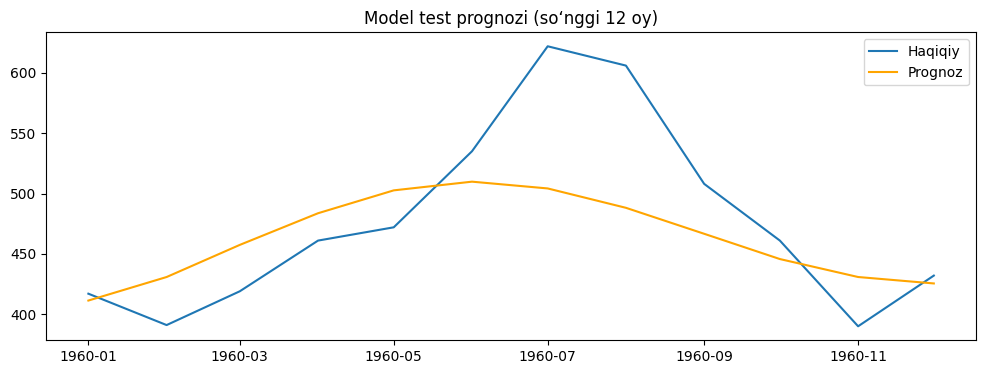

In [14]:
# Ma’lumotni train/testga ajratish
train = df['passengers'][:-12]
test = df['passengers'][-12:]

# Model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Test bo‘yicha prognoz
pred = model_fit.forecast(steps=12)

# Baholash
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"RMSE: {rmse:.2f}")

# Grafik
plt.figure(figsize=(12, 4))
plt.plot(test.index, test, label='Haqiqiy')
plt.plot(test.index, pred, label='Prognoz', color='orange')
plt.title("Model test prognozi (so‘nggi 12 oy)")
plt.legend()
plt.show()